/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


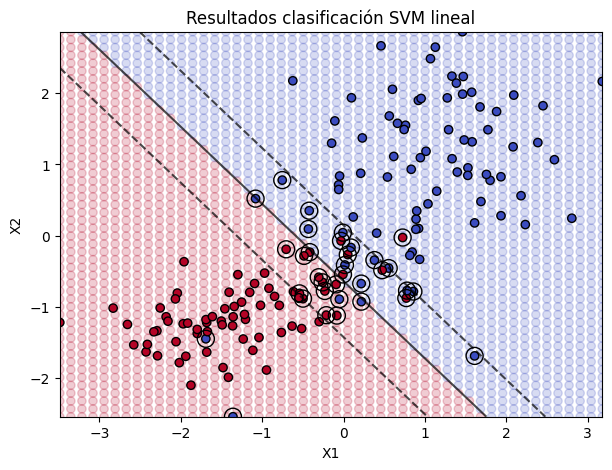

In [4]:
# ========================================================================
# IMPORTACIÓN DE LIBRERÍAS
# ========================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# ========================================================================
# CREACIÓN DE UN DATASET DE EJEMPLO (si no tienes uno cargado)
# ========================================================================
# Si ya tienes 'datos', elimina este bloque
from sklearn.datasets import make_classification
datos, etiquetas = make_classification(
    n_samples=200, n_features=2, n_redundant=0,
    n_informative=2, random_state=123, n_clusters_per_class=1
)
datos = pd.DataFrame(datos, columns=['X1', 'X2'])
datos['y'] = etiquetas

# ========================================================================
# DIVISIÓN DE LOS DATOS EN TRAIN Y TEST
# ========================================================================
X = datos.drop(columns='y')
y = datos['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.8,
    random_state=1234,
    shuffle=True
)

# ========================================================================
# CREACIÓN Y ENTRENAMIENTO DEL MODELO SVM LINEAL
# ========================================================================
modelo = SVC(C=100, kernel='linear', random_state=123)
modelo.fit(X_train, y_train)

# ========================================================================
# REPRESENTACIÓN GRÁFICA DE LOS LÍMITES DE CLASIFICACIÓN
# ========================================================================
x = np.linspace(np.min(X_train['X1']), np.max(X_train['X1']), 50)
y = np.linspace(np.min(X_train['X2']), np.max(X_train['X2']), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción de los valores del grid
pred_grid = modelo.predict(grid)

# Gráfico
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha=0.2, cmap='coolwarm')
ax.scatter(X_train['X1'], X_train['X2'], c=y_train, cmap='coolwarm', edgecolors='k')

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=150, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X, Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors='k',
    levels=[-1, 0, 1],
    alpha=0.7,
    linestyles=['--', '-', '--']
)

ax.set_title("Resultados clasificación SVM lineal")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()
